In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [20]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #getting depricated

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12f9bd828>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12f9bd7b8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12f9bd470>)

In [22]:
mnist.train.images.shape, mnist.train.labels.shape #images are 28 x 28 

((55000, 784), (55000, 10))

In [24]:
mnist.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [25]:
mnist.test.images.shape, mnist.test.labels.shape #labels are one_hot that is why they are 10

((10000, 784), (10000, 10))

In [26]:
mnist.validation.images.shape

(5000, 784)

In [12]:
#let's plot the image
import numpy as np
from matplotlib import pyplot as plt

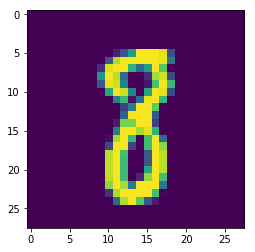

In [15]:
first_image = mnist.train.images[50]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28)) #images were flattened by default
plt.imshow(first_image)
plt.show()

In [16]:
#let's see some dummy data for randon_variable
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval()) #random_normal gives random values, also takes shape as parameter

[[ 0.30369195  0.02883767 -0.47428226 ..., -1.47021675  0.31341851
   1.46269608]
 [-1.21341753  0.58935678  0.1270628  ...,  0.28019038 -1.92573047
  -0.77701652]
 [-0.8166036   1.23244083  1.41464698 ..., -1.44504046  0.13220797
   0.38869116]
 ..., 
 [ 1.29005814 -1.45907724 -0.29812655 ...,  0.57097876  0.75617617
  -2.16167498]
 [ 0.14252061  0.9454844  -1.06582093 ..., -1.69518256 -1.73992813
  -1.1860832 ]
 [ 0.66275382  1.29749119 -2.2147243  ...,  2.12400746  1.77669978
  -0.83294159]]


In [27]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), #784 x 256, randon_normal will give random values
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [37]:
tf.trainable_variables() #optimzer only works on trainable variables

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

In [28]:
#forward propagation code
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1']) #mx + c, all in matrix
    out_layer1 = tf.nn.relu(in_layer1) #same as we applied sigmoid
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [29]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#calling forward propagation
x = tf.placeholder("float", [None, n_input]) #None as we are not sure about the no. images, sometimes training 
                                        #some time testing
y = tf.placeholder(tf.int32, [None, n_classes]) #classes
pred = forward_propagation(x, weights, biases)

In [30]:
predictions = tf.argmax(pred, 1) #argmax for index of max value, for this case 1 in one hot encode , parameter 1 tells the axis
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum() #getting around 5-10% correct without optimizing

878

In [31]:
#Optimizng our code

In [32]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y)) #using cross entropy cost , the formual for cost we saw in logistic regression
#taking mean of cost as we don't want 10,000 size array, taking mean of all the values

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [33]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
for i in range(25):
    c, _ = sess.run([cost,optimize], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels}) #optimizing and calc. cost, each run gives low cost
    print(c)

1664.42
1059.85
682.018
562.575
427.207
310.706
248.721
198.521
161.332
136.914
123.477
118.373
114.615
107.768
98.1396
88.7831
81.8922
77.5254
74.2866
70.932
66.9709
62.6892
58.5972
54.9741
51.804


In [36]:
predictions = tf.argmax(pred, 1) #argmax for index of max value, for this case 1 in one hot encode , parameter 1 tells the axis
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

8841

In [38]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
#Batch gradient descent
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size) #by default provides next batch
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y}) #optimizing and calc. cost, each run gives low cost
        total_cost += c
    print(total_cost)

25198.8123264
4930.7962018
2679.94222737
1921.91261989
1542.48444042
1212.79884847
1047.42894068
1088.13028917
932.061613186
759.60149467
684.364682841
517.65975991
694.464574642
581.080858885
458.551185259
425.184032181
408.098744242
363.562671582
360.545342507
243.874328529
296.146465148
256.883270334
244.686703605
219.031780455
189.218703413


In [40]:
predictions = tf.argmax(pred, 1) #argmax for index of max value, for this case 1 in one hot encode , parameter 1 tells the axis
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels) #tells us where the value are equal
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9589